## Heart Disease Diagnosis

In [3]:
# Plotting Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import cufflinks as cf
%matplotlib inline

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  RandomizedSearchCV, train_test_split

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Data Loading

Our first step is to extract train and test data. We will be extracting data using pandas function read_csv. Specify the location to the dataset and import them.

In [4]:
# Importing Data

data = pd.read_csv("heart.csv")
data.head(6) # Mention no of rows to be displayed from the top in the argument

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


# Exploratory Data Analysis 

In [5]:
#Size of the dataset
data.shape

(303, 14)

**We have a dataset with 303 rows which indicates a smaller set of data.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


* Out of 14 features, we have 13 int type and only one with float data type.
* Woah! We have no missing values in our dataset.

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Let's check correleation between various features.**

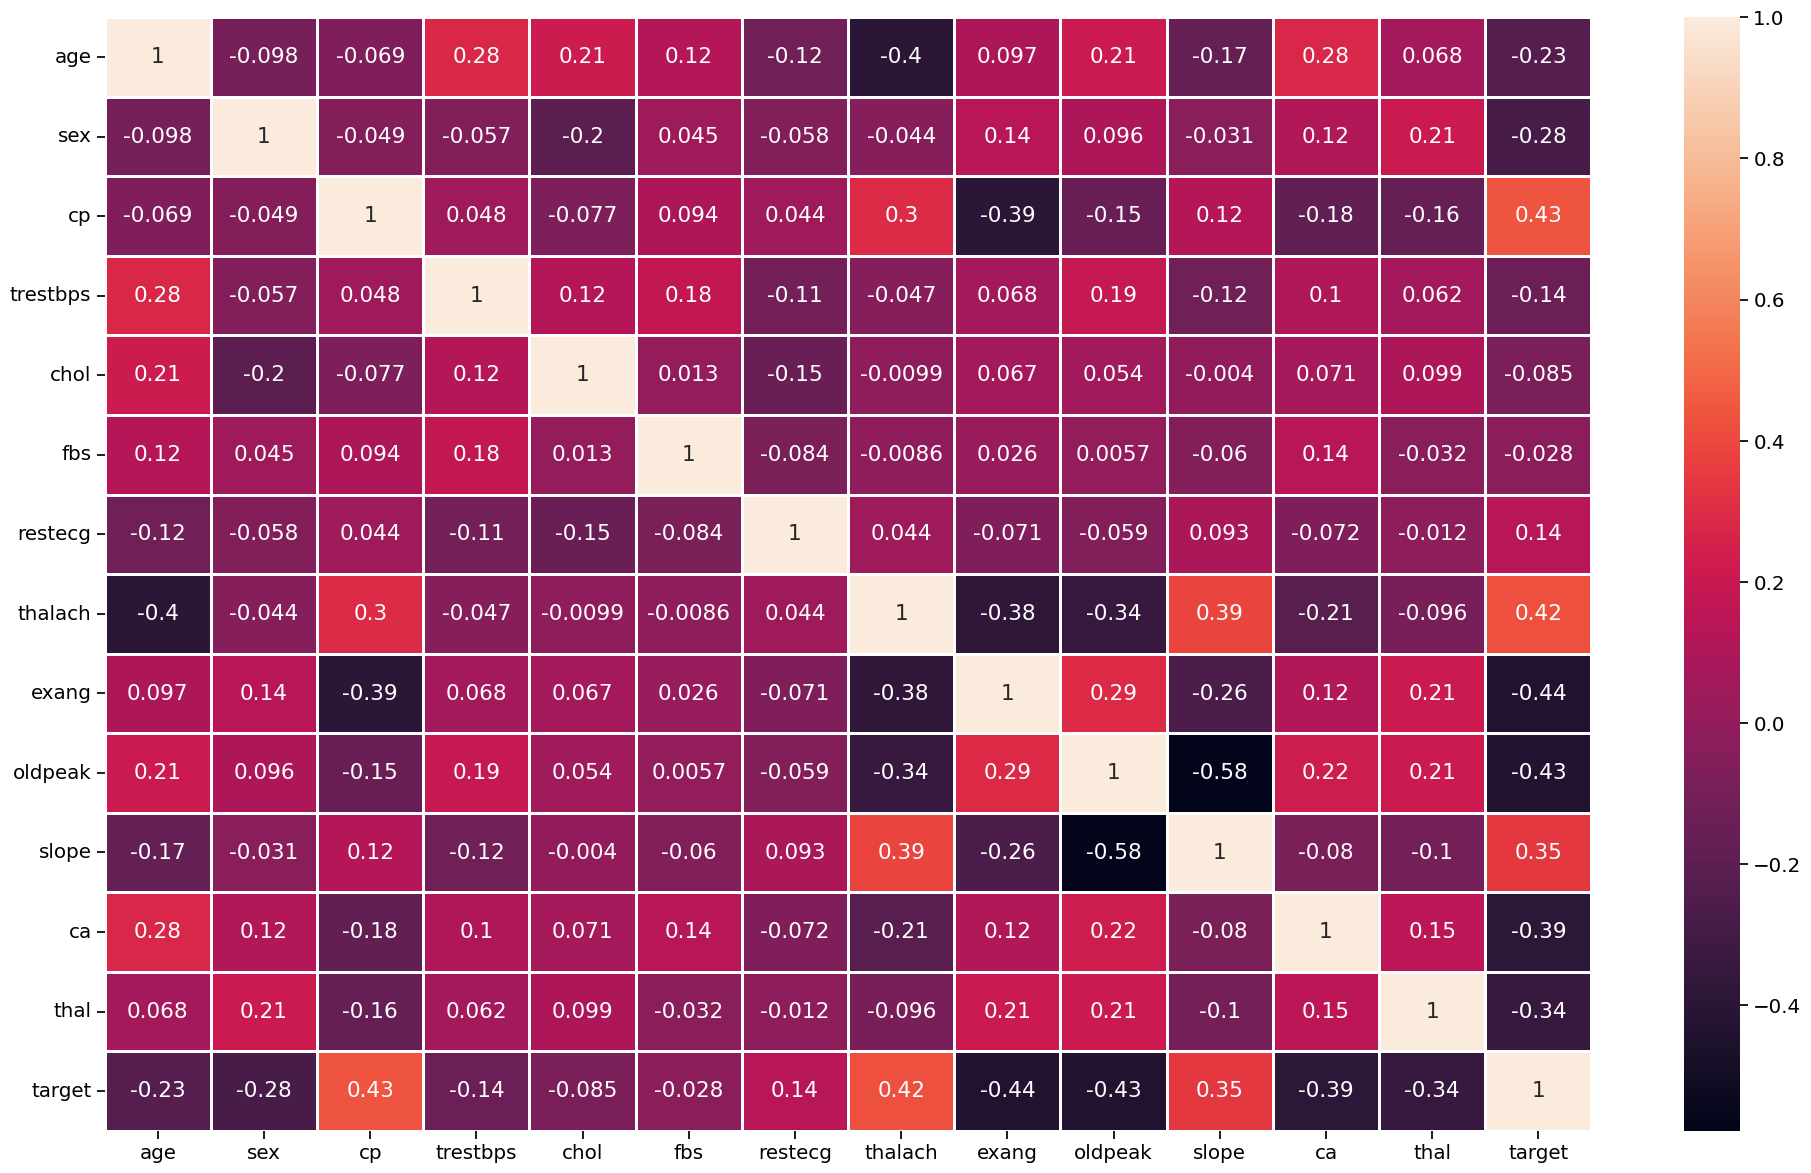

In [8]:
plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 1.3)
sns.heatmap(data.corr(),annot=True,linewidth =2)
plt.tight_layout()

**Let's check the correlation of various features with the target feature.**

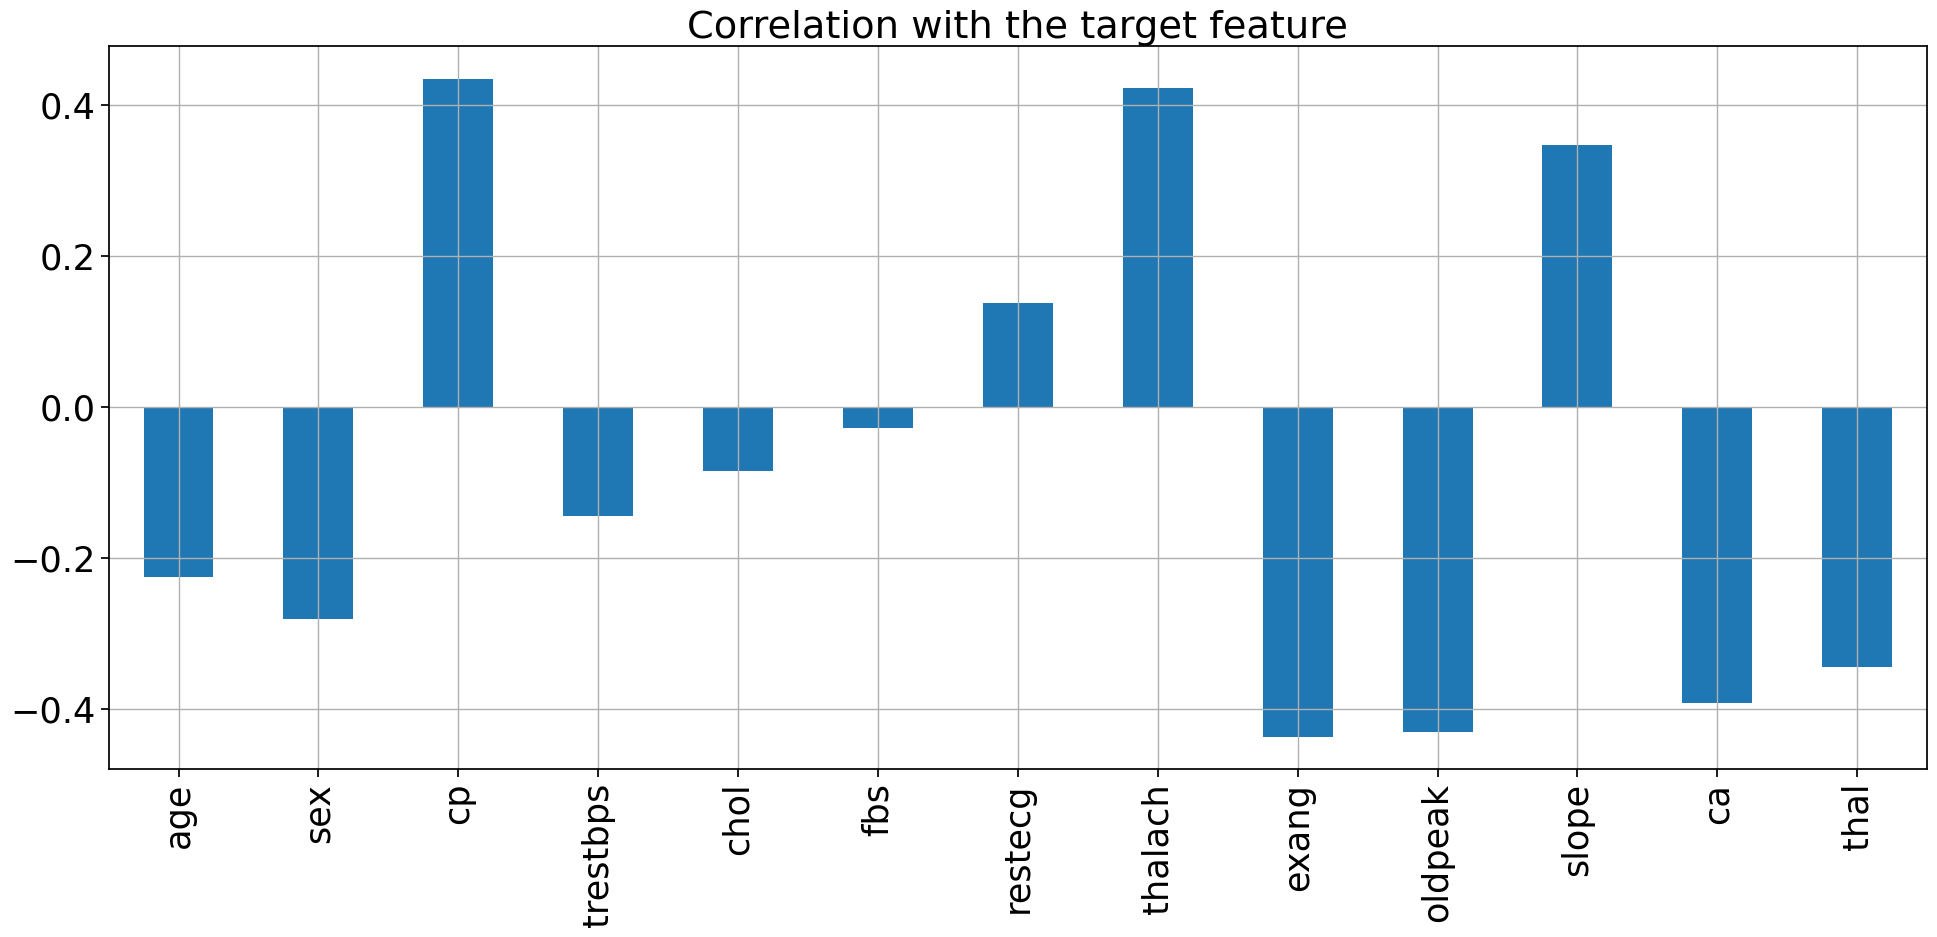

In [9]:
# plt.figure(figsize=(20,12))
sns.set_context('notebook',font_scale = 2.3)
data.drop('target', axis=1).corrwith(data.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                   title="Correlation with the target feature")
plt.tight_layout()

* Four feature( "cp", "restecg", "thalach", "slope" ) are positively correlated with the target feature.
* Other features are negatively correlated with the target feature.

**Individual Feature Analysis**

## Age("age") Analysis

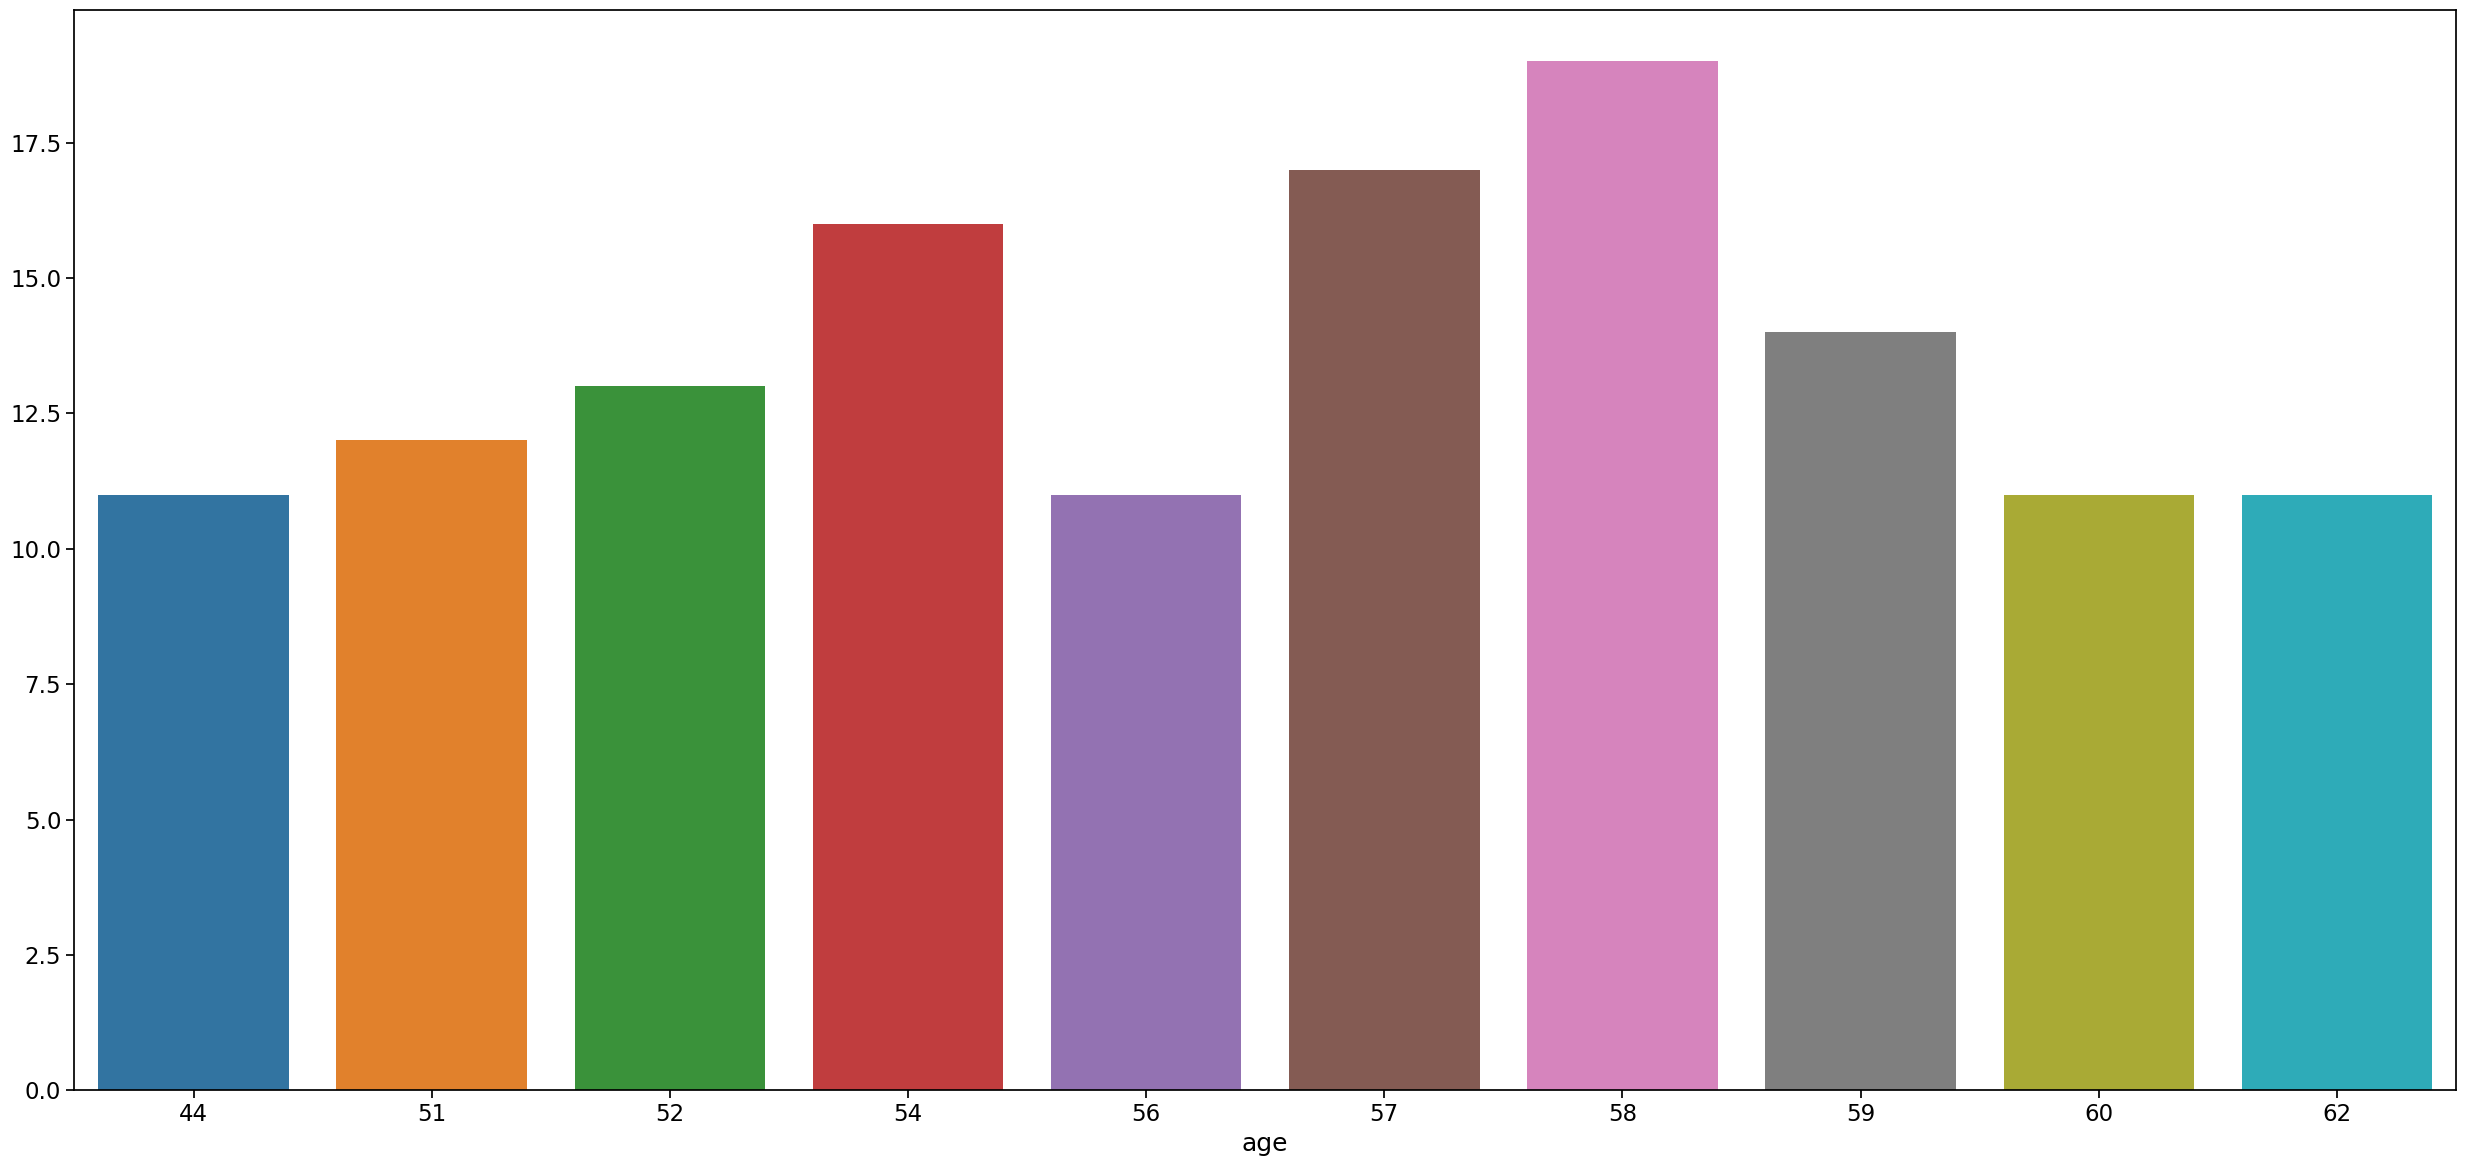

In [10]:
# Let's check 10 ages and their count

plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=data.age.value_counts()[:10].index,y=data.age.value_counts()[:10].values)
plt.tight_layout()

**Let's check the range of age in the dataset.**

In [11]:
minAge=min(data.age)
maxAge=max(data.age)
meanAge=data.age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


**We should divide the Age feature into three parts - "Young", "Middle" and "Elder"**

In [12]:
Young = data[(data.age>=29)&(data.age<40)]
Middle = data[(data.age>=40)&(data.age<55)]
Elder = data[(data.age>55)]

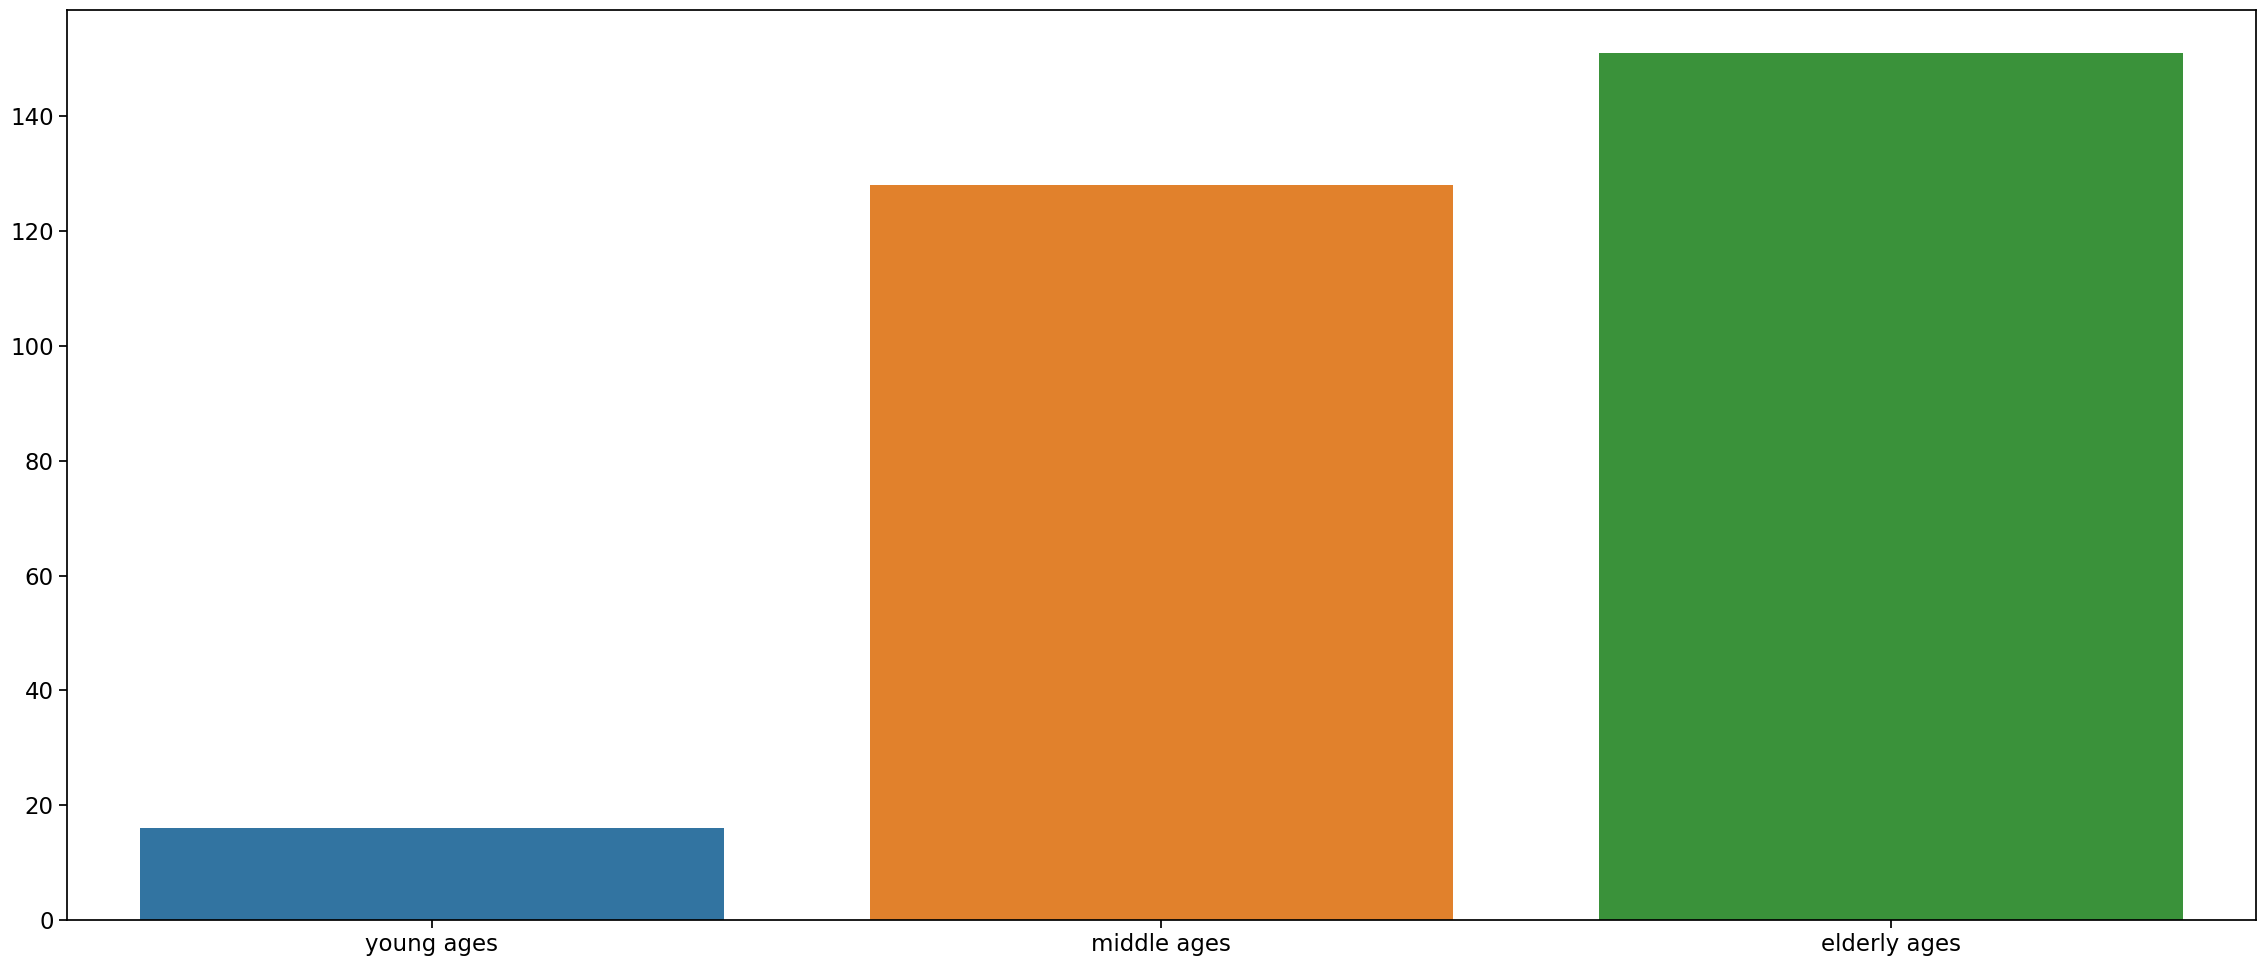

In [13]:
plt.figure(figsize=(23,10))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(Young),len(Middle),len(Elder)])
plt.tight_layout()

**A large proportion of dataset contains Elder people.**

**Elderly people are more likely to suffer from heart disease.**

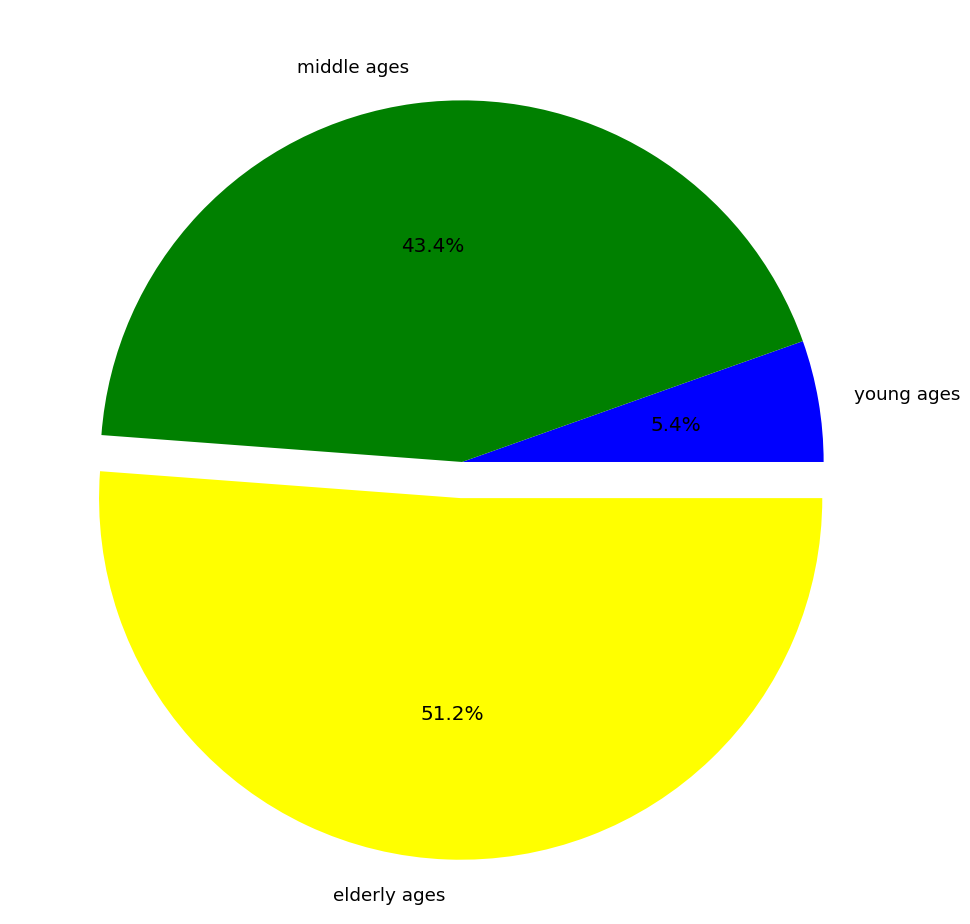

In [14]:
colors = ['blue','green','yellow']
explode = [0,0,0.1]
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale = 1.2)
plt.pie([len(Young),len(Middle),len(Elder)],labels=['young ages','middle ages','elderly ages'],explode=explode,colors=colors, autopct='%1.1f%%')
plt.tight_layout()

## Sex("sex") Feature Analysis

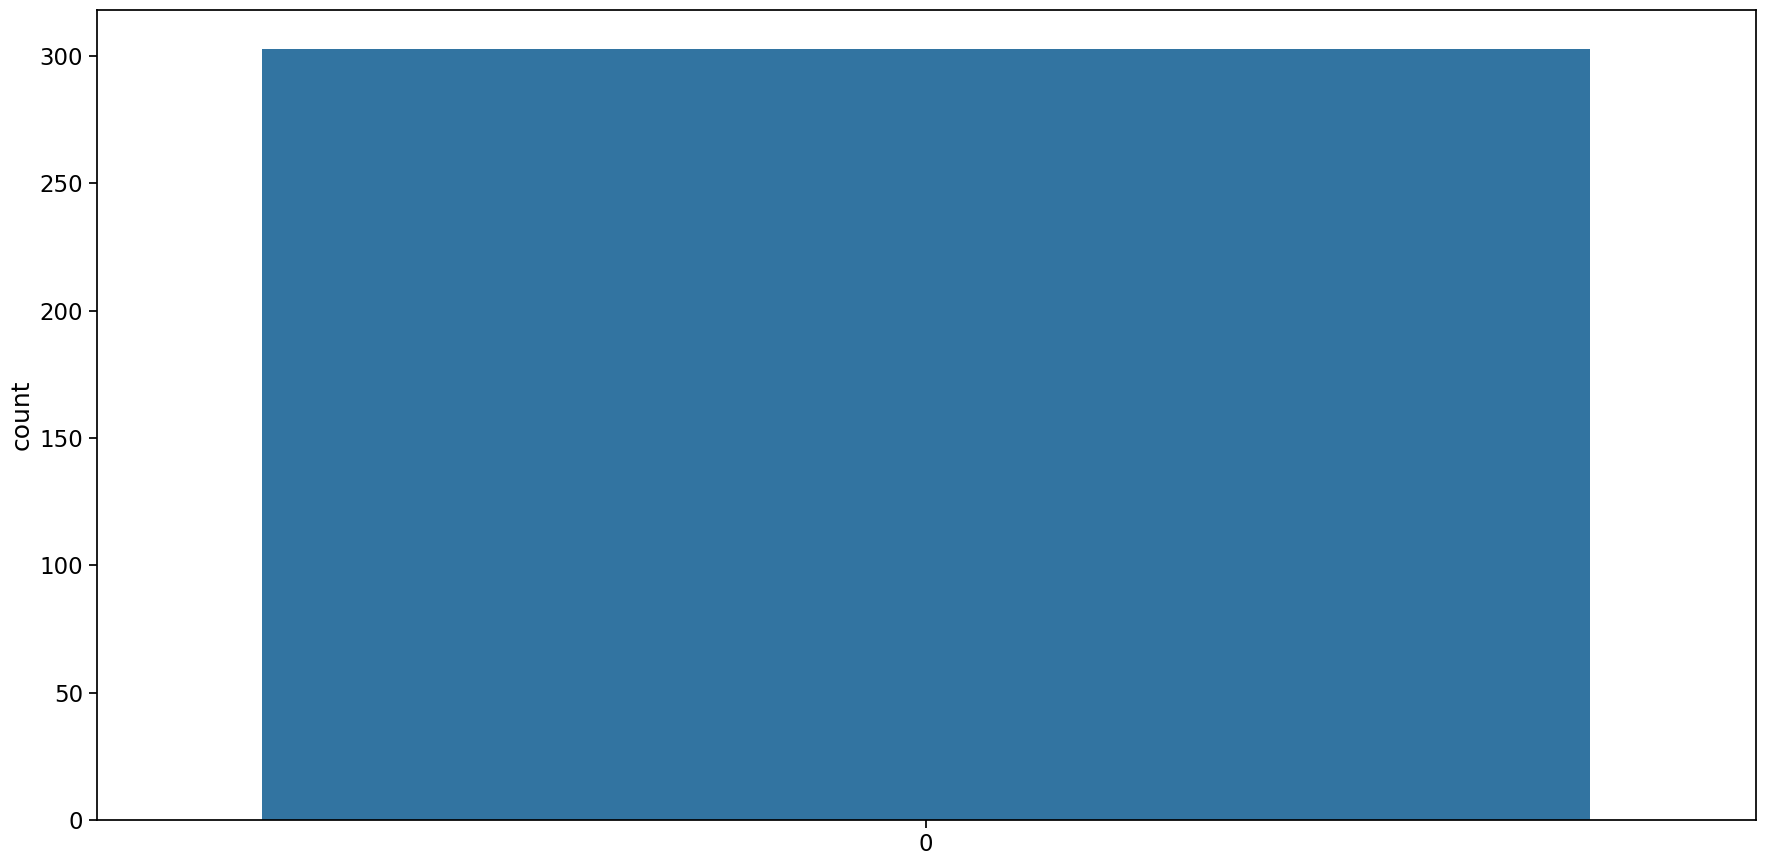

In [15]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['sex'])
plt.tight_layout()

**Ratio of Male to Female is approx 2:1**

In [16]:
# Let's plot the relation between sex and slope.

plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['sex'],hue=data["slope"])
plt.tight_layout()

ValueError: Cannot use `hue` without `x` and `y`

<Figure size 1800x900 with 0 Axes>

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


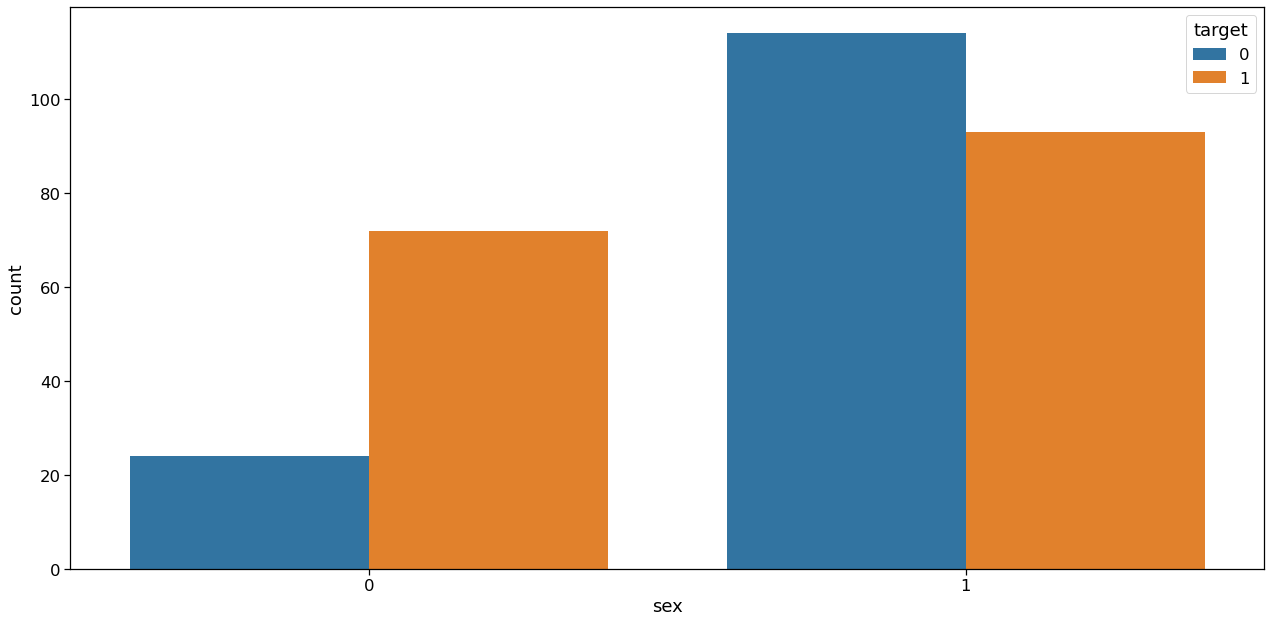

In [ ]:
# Let's plot the relation between sex and target.

plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['sex'],hue=data["target"])
plt.tight_layout()

**Males are more likely to have heart disease than Female.**

## Chest Pain Type("cp") Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


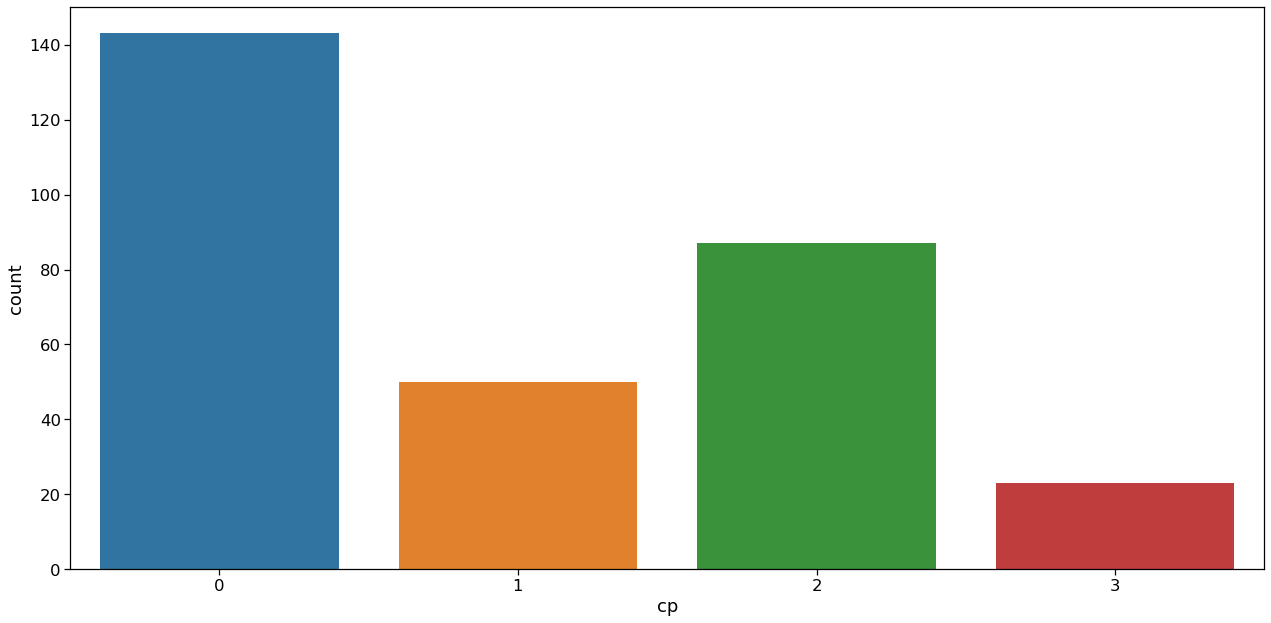

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'])
plt.tight_layout()

**As seen, there are 4 types of chest pain**

1. status at least
2. condition slightly distressed
3. condition medium problem
4. condition too bad

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


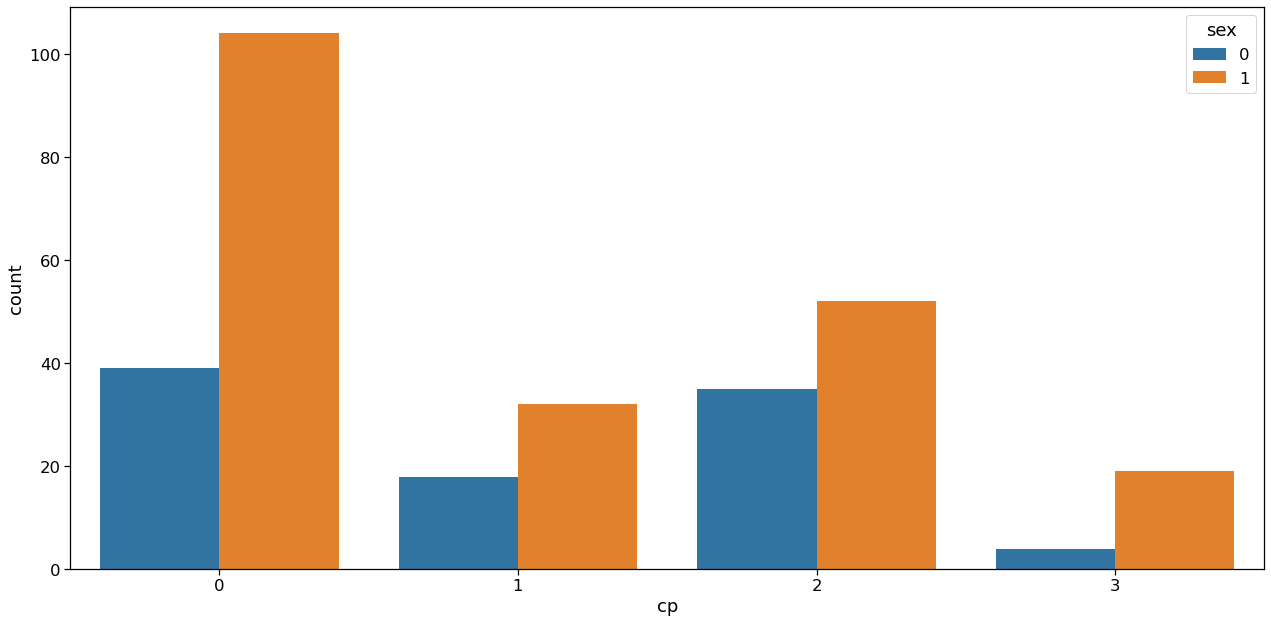

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'],hue=data["sex"])
plt.tight_layout()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


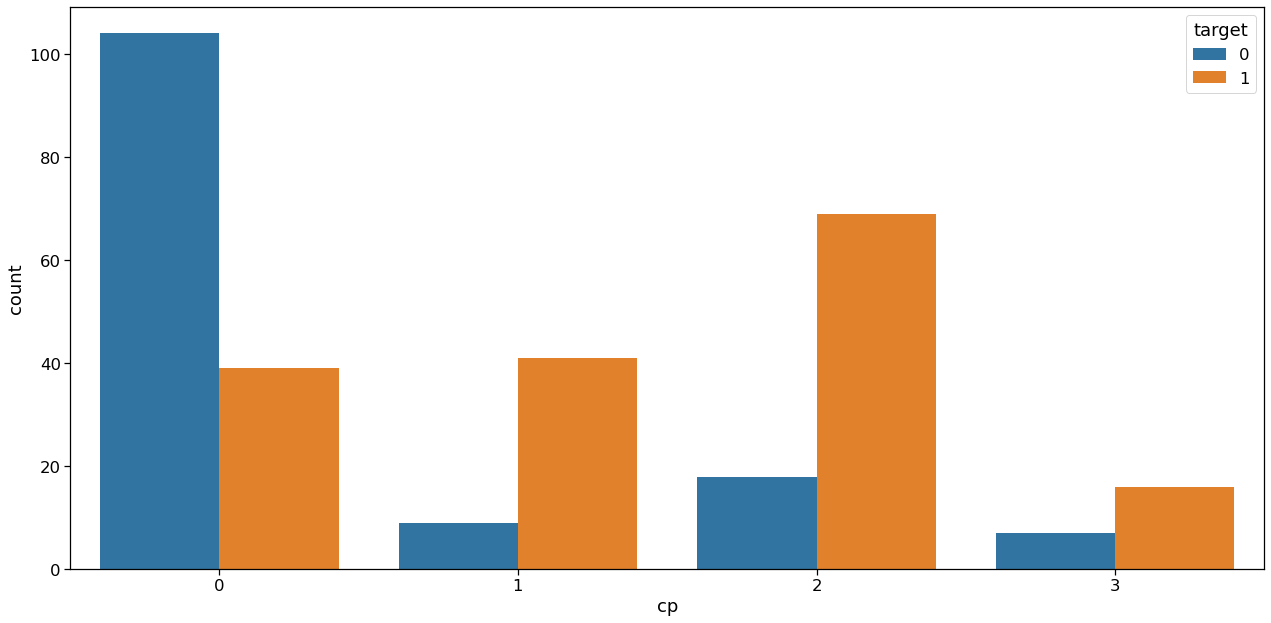

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['cp'],hue=data["target"])
plt.tight_layout()

* People having least chest pain are not likely to heart disease.
* People having severe chest pain are  likely to heart disease.

**Elderly people are more likely to have chest pain.**

# Thal Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


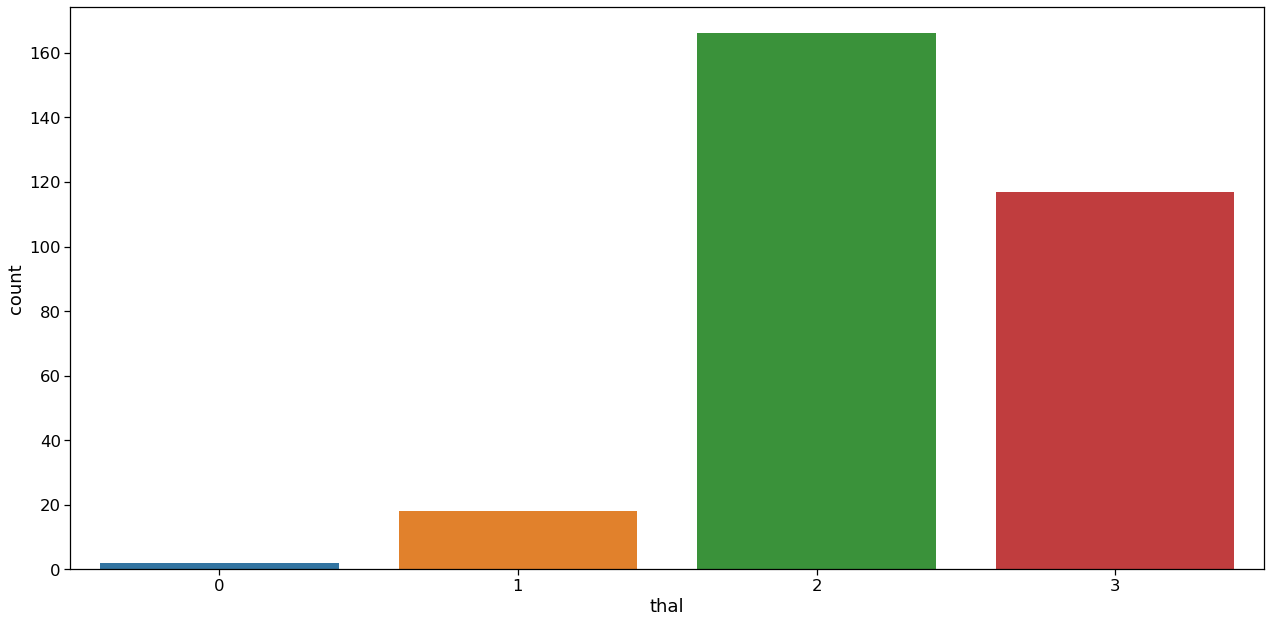

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['thal'])
plt.tight_layout()

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


1. 3 = normal
2. 6 = fixed defect
3. 7 = reversable defect

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


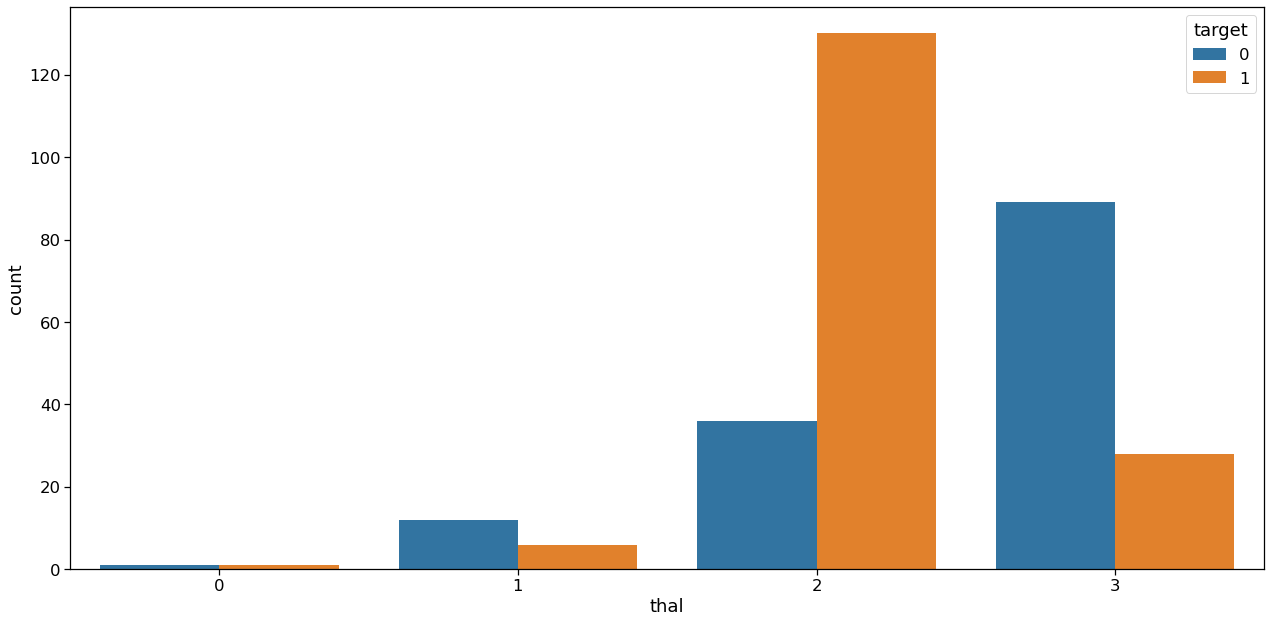

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['thal'],hue=data["target"])
plt.tight_layout()

**People with fixed defect are more likely to have heart disease.**

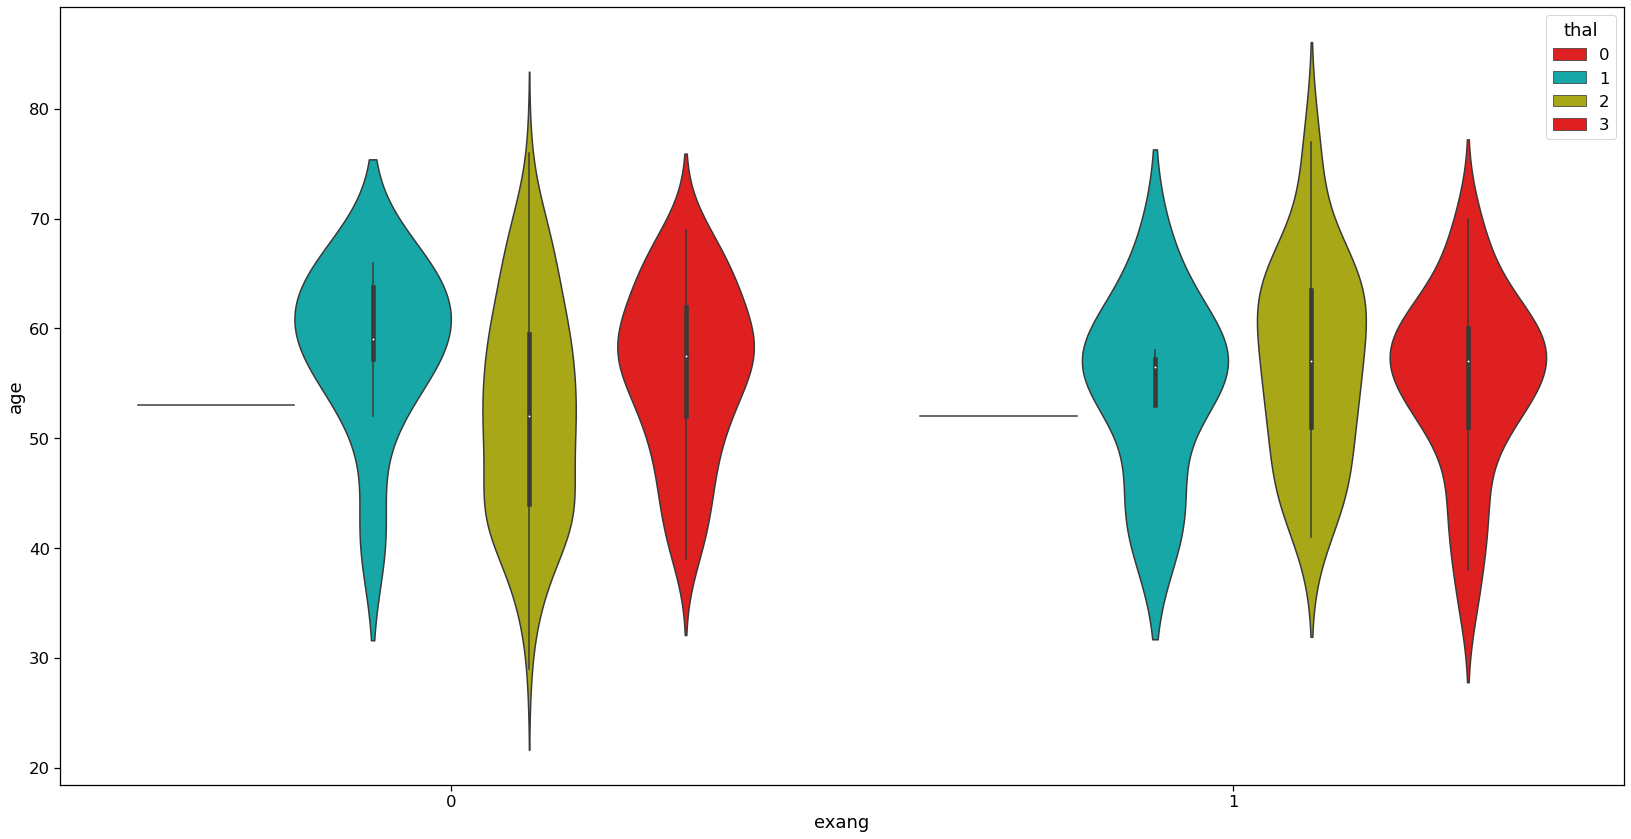

In [ ]:
plt.figure(figsize=(23,12))
sns.set_context('notebook',font_scale = 1.5)
sns.violinplot(x="exang",y="age",data=data,palette=["r", "c", "y"],hue="thal")
plt.tight_layout()

## Target 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


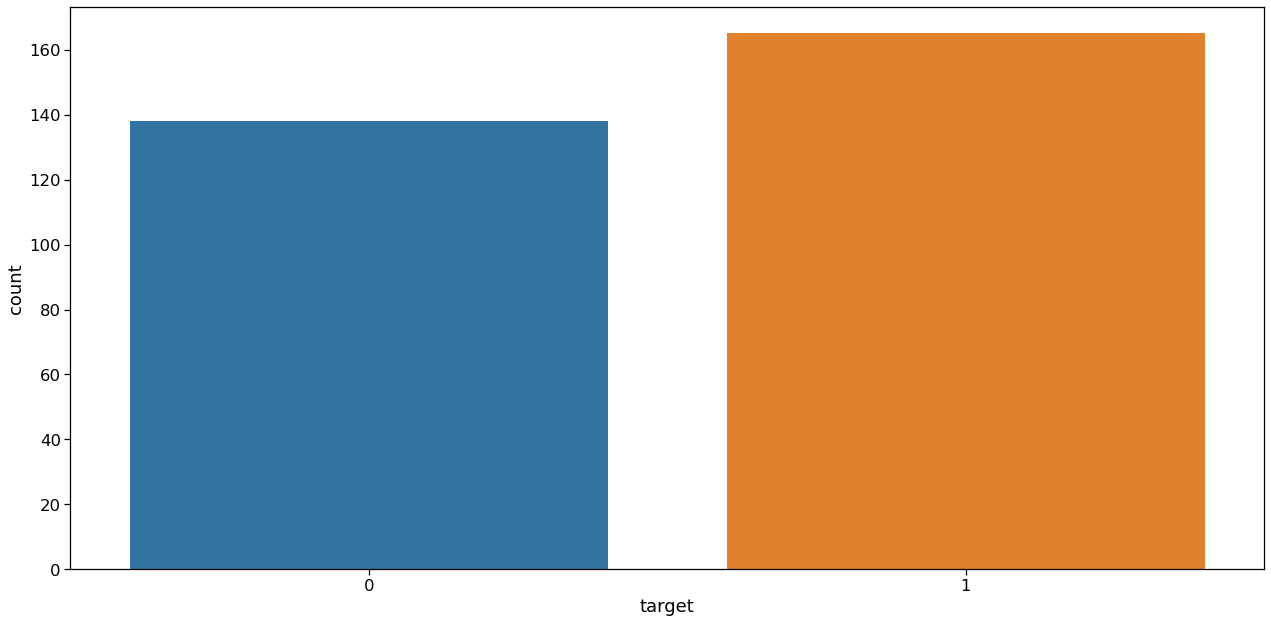

In [ ]:
plt.figure(figsize=(18,9))
sns.set_context('notebook',font_scale = 1.5)
sns.countplot(data['target'])
plt.tight_layout()

Inference: The ratio between 1 and 0 is much less than 1.5 which indicates that target feature is not imbalanced. So for a balanced dataset, we can use accuracy_score as evaluation metrics for our model.

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Feature Enginnering

In [ ]:
categorical_val = []
continous_val = []
for column in data.columns:
    print("--------------------")
    print(f"{column} : {data[column].unique()}")
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

Now here first we will be removing the target column from our set of features then we will categorised all the categorical variables using get dummies method which will create the seperate column for each category suppose X variable contains 2 types of unique values then it will create 2 different columns for X variable

In [ ]:
categorical_val.remove('target')
dfs = pd.get_dummies(data, columns = categorical_val)

In [ ]:
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,57,140,192,148,0.4,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


Now we will be using the standard scaler method to scale down the data so that it won't raise the outliers also dataset which is scaled to general units leads to have better accuracy.

In [ ]:
sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dfs[col_to_scale] = sc.fit_transform(dfs[col_to_scale])

In [ ]:
dfs.head(6)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
5,0.290464,0.478391,-1.048678,-0.072018,-0.551783,1,0,1,1,0,...,0,1,0,0,0,0,0,1,0,0


# Modelling

**Splitting our dataset**

In [ ]:
X = dfs.drop('target', axis=1)
y = dfs.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
124,-1.694735,-2.148802,-0.913400,1.283627,-0.896862,1,0,0,0,1,...,1,1,0,0,0,0,0,0,1,0
72,-2.797624,-0.092738,-0.816773,2.289429,-0.896862,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
15,-0.481558,-0.663867,-0.526890,0.365287,0.483451,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
10,-0.040403,0.478391,-0.140381,0.452748,0.138373,0,1,1,0,0,...,1,1,0,0,0,0,0,0,1,0
163,-1.805024,0.364165,-1.377212,1.021244,-0.896862,0,1,0,0,1,...,1,0,0,0,0,1,0,0,1,0


We will work on following algo - 

* KNN
* Random Forest Classifier
* XGBoost
* CatBoost

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred1 = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred1))

0.8571428571428571


In [ ]:
# Hyperparameter Optimization

test_score = []
neighbors = range(1, 25)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

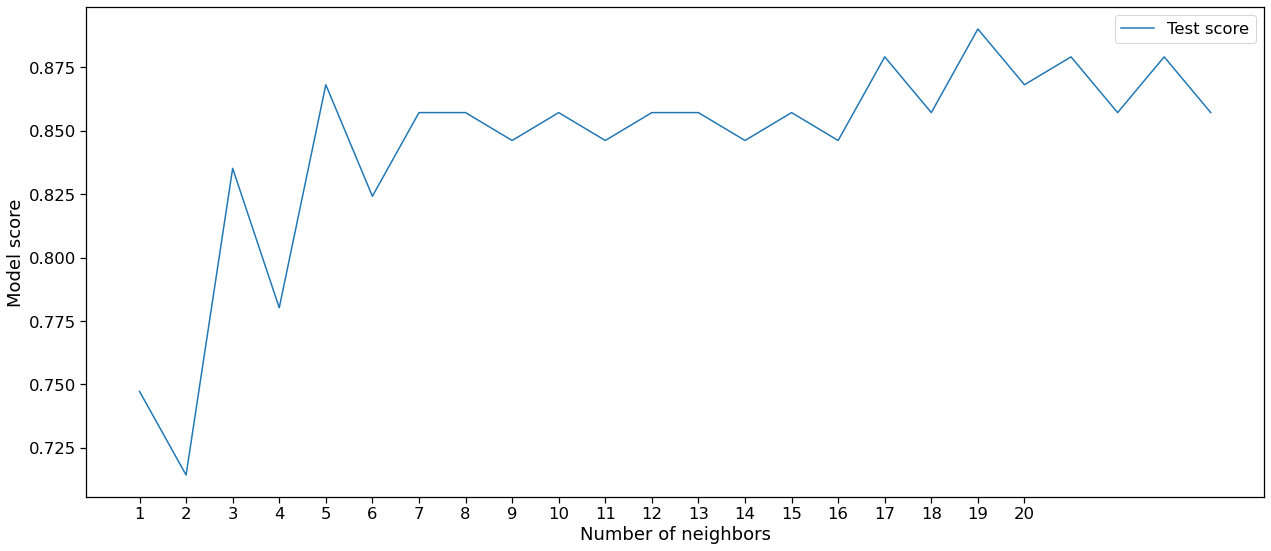

In [ ]:
plt.figure(figsize=(18, 8))
plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()
plt.tight_layout()

**At K=19, we are getting highest test accuracy.**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 19)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [ ]:
y_pred1 = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred1))

0.8901098901098901


**We achieved accuracy 89% with KNN Model after Hyperparameter Optimization.**

## Random Forest Classifier

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred2))

0.8241758241758241


In [ ]:
## Hyperparameter Optimization

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)

params2 ={
    
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)], 
    'max_features': ['auto', 'sqrt'],
    'max_depth': max_depth, 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'bootstrap': [True, False]
}

In [ ]:
rfc = RandomForestClassifier(random_state=42)

rfcs = RandomizedSearchCV(estimator=rfc, param_distributions=params2, n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

In [ ]:
rfcs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 10.8min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
rfcs.best_estimator_

RandomForestClassifier(max_depth=70, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=400, random_state=42)

In [ ]:
y_pred2 = rfcs.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.8351648351648352


**We achieved accuracy 83% approx with Random Forest Classifier Model. There is no improvement after Hyperparameter Optimization.**

## XGBoost

In [ ]:
xgb = XGBClassifier(random_state = 42)
xgb.fit(X_train,y_train)
y_pred3 = xgb.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:47:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [ ]:
print(accuracy_score(y_test,y_pred3))

0.8241758241758241


**We achieved accuracy 83% approx with XGBoost Classifier Model.**

### Conclusion

**From the above models KNN is giving us the best accuracy which is 89%.**